In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline

data collection

In [2]:
data=pd.read_csv('C://Users//kevin//Desktop/LendingClubDS.csv')

In [3]:
data.head()

,member_id,loan_amnt,funded_amnt,term,int_rate,installment,grade,home_ownership,annual_inc,dti,fico_range_low,fico_range_high,loan_status
0,1296599,5000,5000,36 months,10.65%,162.87,B,RENT,24000.0,27.65,735,739,Fully Paid
1,1314167,2500,2500,60 months,15.27%,59.83,C,RENT,30000.0,1.00,740,744,Charged Off
2,1313524,2400,2400,36 months,15.96%,84.33,C,RENT,12252.0,8.72,735,739,Fully Paid
3,1277178,10000,10000,36 months,13.49%,339.31,C,RENT,49200.0,20.00,690,694,Fully Paid
4,1311748,3000,3000,60 months,12.69%,67.79,B,RENT,80000.0,17.94,695,699,Current


In [4]:
data.shape

(5000, 13)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
member_id          5000 non-null int64
loan_amnt          5000 non-null int64
funded_amnt        5000 non-null int64
term               5000 non-null object
int_rate           5000 non-null object
installment        5000 non-null float64
grade              5000 non-null object
home_ownership     5000 non-null object
annual_inc         5000 non-null float64
dti                5000 non-null float64
fico_range_low     5000 non-null int64
fico_range_high    5000 non-null int64
loan_status        5000 non-null object
dtypes: float64(3), int64(5), object(5)
memory usage: 507.9+ KB


data discription and preprocessing

In [6]:
#1.loan amnt
data.loan_amnt.describe()

count     5000.000000
mean     13032.455000
std       8256.520201
min       1000.000000
25%       6500.000000
50%      12000.000000
75%      17525.000000
max      35000.000000
Name: loan_amnt, dtype: float64

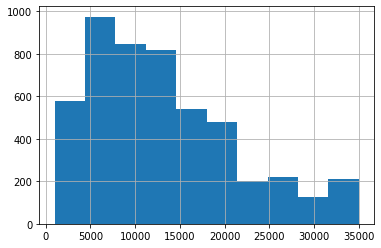

In [7]:
data.loan_amnt.hist()

In [8]:
#2.funded amnt
data.funded_amnt.describe()

count     5000.000000
mean     12905.360000
std       8120.010248
min       1000.000000
25%       6500.000000
50%      12000.000000
75%      17050.000000
max      35000.000000
Name: funded_amnt, dtype: float64

(array([1.000e+00, 1.000e+00, 1.000e+00, 3.700e+01, 2.000e+01, 9.000e+00,
        6.000e+00, 6.000e+00, 1.000e+00, 4.918e+03]),
 array([0.42142857, 0.47928571, 0.53714286, 0.595     , 0.65285714,
        0.71071429, 0.76857143, 0.82642857, 0.88428571, 0.94214286,
        1.        ]),
 <a list of 10 Patch objects>)

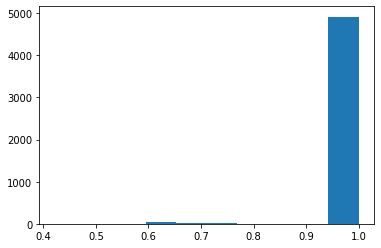

In [9]:
fund_propotion=data.funded_amnt/data.loan_amnt
#fund_propotion.hist()
plt.hist(fund_propotion)

In [10]:
sum=0
for i in range(5000):
    if data.iloc[i,1]==data.iloc[i,2]:
       sum+=1
print(sum/5000)    

0.9834


In [11]:
data.term.head()

0     36 months
1     60 months
2     36 months
3     36 months
4     60 months
Name: term, dtype: object

In [12]:
data.term.unique()

array([' 36 months', ' 60 months'], dtype=object)

In [13]:
s0='36 months'
s0=s0.replace('months',' ').strip()

In [14]:
s0

'36'

In [15]:
data2=data.copy()

In [16]:
data2['term']=data.term.str.replace('months',' ').str.strip().astype('int')

In [17]:
data2['term'].unique()

array([36, 60], dtype=int64)

In [18]:
data2['term'].head()

0    36
1    60
2    36
3    36
4    60
Name: term, dtype: int32

In [19]:
data2.term.head()

0    36
1    60
2    36
3    36
4    60
Name: term, dtype: int32

In [20]:
data2.term.value_counts()

36    3386
60    1614
Name: term, dtype: int64

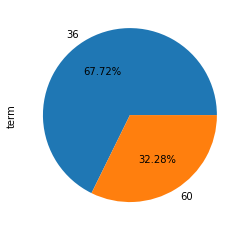

In [21]:
data2.term.value_counts().plot.pie(autopct='%.2f%%')

In [22]:
#4 interset rate
data.int_rate.head()

0    10.65%
1    15.27%
2    15.96%
3    13.49%
4    12.69%
Name: int_rate, dtype: object

In [23]:
data2['int_rate']=data.int_rate.str.replace('%','').str.strip().astype('float')/100
data2.int_rate.head()

0    0.1065
1    0.1527
2    0.1596
3    0.1349
4    0.1269
Name: int_rate, dtype: float64

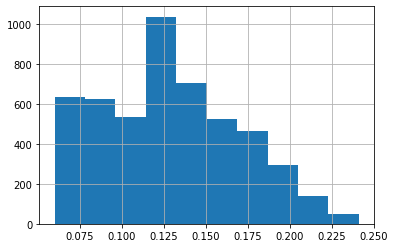

In [24]:
data2.int_rate.hist()

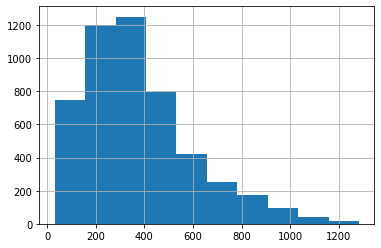

In [25]:
#5.installment
data.installment.hist()

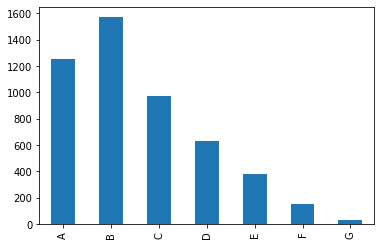

In [26]:
#6.grade
data.grade.value_counts().sort_index().plot.bar()

In [27]:
data2['grade']=data.grade.astype('category').cat.as_ordered().cat.codes
data2['grade'].head()

0    1
1    2
2    2
3    2
4    1
Name: grade, dtype: int8

In [28]:
#home ownership

In [29]:
data.home_ownership.value_counts()

RENT        2508
MORTGAGE    2108
OWN          384
Name: home_ownership, dtype: int64

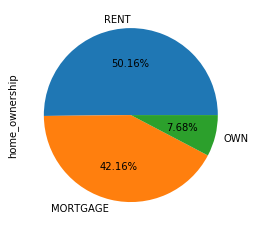

In [30]:
data2.home_ownership.value_counts().plot.pie(autopct='%.2f%%')

In [31]:
data2['home_ownership']=data.home_ownership.astype('category')
data2['home_ownership'].head()

0    RENT
1    RENT
2    RENT
3    RENT
4    RENT
Name: home_ownership, dtype: category
Categories (3, object): [MORTGAGE, OWN, RENT]

In [32]:
ho_dumnies=pd.get_dummies(data.home_ownership)
ho_dumnies

,MORTGAGE,OWN,RENT
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1
5,0,0,1
6,0,0,1
7,0,0,1
8,0,1,0
9,0,0,1


In [33]:
data2=pd.concat([data2,ho_dumnies],axis=1)
data2.head()

,member_id,loan_amnt,funded_amnt,term,int_rate,installment,grade,home_ownership,annual_inc,dti,fico_range_low,fico_range_high,loan_status,MORTGAGE,OWN,RENT
0,1296599,5000,5000,36,0.1065,162.87,1,RENT,24000.0,27.65,735,739,Fully Paid,0,0,1
1,1314167,2500,2500,60,0.1527,59.83,2,RENT,30000.0,1.00,740,744,Charged Off,0,0,1
2,1313524,2400,2400,36,0.1596,84.33,2,RENT,12252.0,8.72,735,739,Fully Paid,0,0,1
3,1277178,10000,10000,36,0.1349,339.31,2,RENT,49200.0,20.00,690,694,Fully Paid,0,0,1
4,1311748,3000,3000,60,0.1269,67.79,1,RENT,80000.0,17.94,695,699,Current,0,0,1


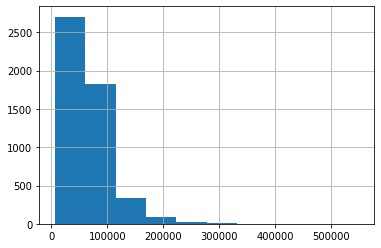

In [34]:
#annual income
data.annual_inc.hist()

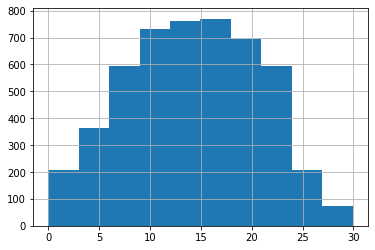

In [35]:
data.dti.hist()

In [36]:
data2['fico_avg']=(data.fico_range_low+data.fico_range_high)/2

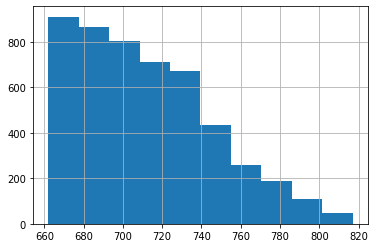

In [37]:
data2.fico_avg.hist()

In [38]:
#loan status
data.loan_status.value_counts()

Fully Paid            3817
Charged Off            839
Current                328
In Grace Period          9
Late (31-120 days)       5
Late (16-30 days)        2
Name: loan_status, dtype: int64

In [39]:
status=data.loan_status.unique()
status

array(['Fully Paid', 'Charged Off', 'Current', 'In Grace Period',
       'Late (31-120 days)', 'Late (16-30 days)'], dtype=object)

In [40]:
vals=[0,1,-1,-1,1,1]
dict_status=dict(zip(status,vals))
dict_status

{'Fully Paid': 0,
 'Charged Off': 1,
 'Current': -1,
 'In Grace Period': -1,
 'Late (31-120 days)': 1,
 'Late (16-30 days)': 1}

In [41]:
data2['loan_status']=data2.loan_status.map(dict_status)
data2.loan_status.value_counts()

 0    3817
 1     846
-1     337
Name: loan_status, dtype: int64

In [42]:
data2.head()

,member_id,loan_amnt,funded_amnt,term,int_rate,installment,grade,home_ownership,annual_inc,dti,fico_range_low,fico_range_high,loan_status,MORTGAGE,OWN,RENT,fico_avg
0,1296599,5000,5000,36,0.1065,162.87,1,RENT,24000.0,27.65,735,739,0,0,0,1,737.0
1,1314167,2500,2500,60,0.1527,59.83,2,RENT,30000.0,1.00,740,744,1,0,0,1,742.0
2,1313524,2400,2400,36,0.1596,84.33,2,RENT,12252.0,8.72,735,739,0,0,0,1,737.0
3,1277178,10000,10000,36,0.1349,339.31,2,RENT,49200.0,20.00,690,694,0,0,0,1,692.0
4,1311748,3000,3000,60,0.1269,67.79,1,RENT,80000.0,17.94,695,699,-1,0,0,1,697.0


In [43]:
dropcols=['member_id','funded_amnt','fico_range_low','fico_range_high','home_ownership']
selcols=[i for i in data2.columns if i not in dropcols]
selcols

['loan_amnt',
 'term',
 'int_rate',
 'installment',
 'grade',
 'annual_inc',
 'dti',
 'loan_status',
 'MORTGAGE',
 'OWN',
 'RENT',
 'fico_avg']

In [44]:
selrows=data2.loan_status>=0 
data3=data2.loc[selrows,selcols]
data3.head()

,loan_amnt,term,int_rate,installment,grade,annual_inc,dti,loan_status,MORTGAGE,OWN,RENT,fico_avg
0,5000,36,0.1065,162.87,1,24000.0,27.65,0,0,0,1,737.0
1,2500,60,0.1527,59.83,2,30000.0,1.00,1,0,0,1,742.0
2,2400,36,0.1596,84.33,2,12252.0,8.72,0,0,0,1,737.0
3,10000,36,0.1349,339.31,2,49200.0,20.00,0,0,0,1,692.0
5,5000,36,0.0790,156.46,0,36000.0,11.20,0,0,0,1,732.0


In [45]:
data3.shape

(4663, 12)

In [46]:
data3.to_csv('p2p_data.csv')

modeling

In [47]:
import sklearn
sklearn.__version__

'0.21.2'

In [48]:
from sklearn.linear_model import LogisticRegression

In [49]:
model=LogisticRegression()

In [50]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4663 entries, 0 to 4999
Data columns (total 12 columns):
loan_amnt      4663 non-null int64
term           4663 non-null int32
int_rate       4663 non-null float64
installment    4663 non-null float64
grade          4663 non-null int8
annual_inc     4663 non-null float64
dti            4663 non-null float64
loan_status    4663 non-null int64
MORTGAGE       4663 non-null uint8
OWN            4663 non-null uint8
RENT           4663 non-null uint8
fico_avg       4663 non-null float64
dtypes: float64(5), int32(1), int64(2), int8(1), uint8(3)
memory usage: 327.9 KB


In [51]:
from sklearn.model_selection import train_test_split

In [54]:
y=data3['loan_status']
x=data3.drop('loan_status',axis=1)
x_train,x_test,y_train,y_test=train_test_split(x, y, test_size=0.4, random_state=0)

In [55]:
model.fit(x_train,y_train)

F:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [60]:
model.coef_

array([[-3.97458061e-05,  6.60412631e-02,  4.60120889e-04,
         1.65041415e-03,  1.40217318e-02, -8.93066839e-06,
         1.38096603e-02, -1.39517236e-03,  2.13791409e-04,
         1.54025036e-03, -5.92937056e-03]])

In [62]:
y_pred=model.predict(x_test)

In [56]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [63]:
confusion_matrix(y_test, y_pred)

array([[1531,    4],
       [ 326,    5]], dtype=int64)

In [64]:
accuracy_score(y_test,y_pred)

0.8231511254019293